•	(Ungraded) DataCamp Github Chapters: *Basic Work Flow* and *Repositories*; Read Guttag Ch 9-10
(Note: You will need to complete your github.io webpage for the final exam -- I recommend you do this now and not leave it to the exam.)

•	(Graded) Below exercise. **Part I**: Scrape weather.com for zipcode 93405 scraping the following information in red, and storing it in a csv: feel's like, high, low, wind, humidity, dewpoint, pressure, and visibility. Just store the numbers (not %, mph, NE etc.). There are many ways to scrape the information, but the BeautifulSoup methods: .find(), .findall(), .text(), as well as using the list-like structure of each element scraped can accomplish it all.

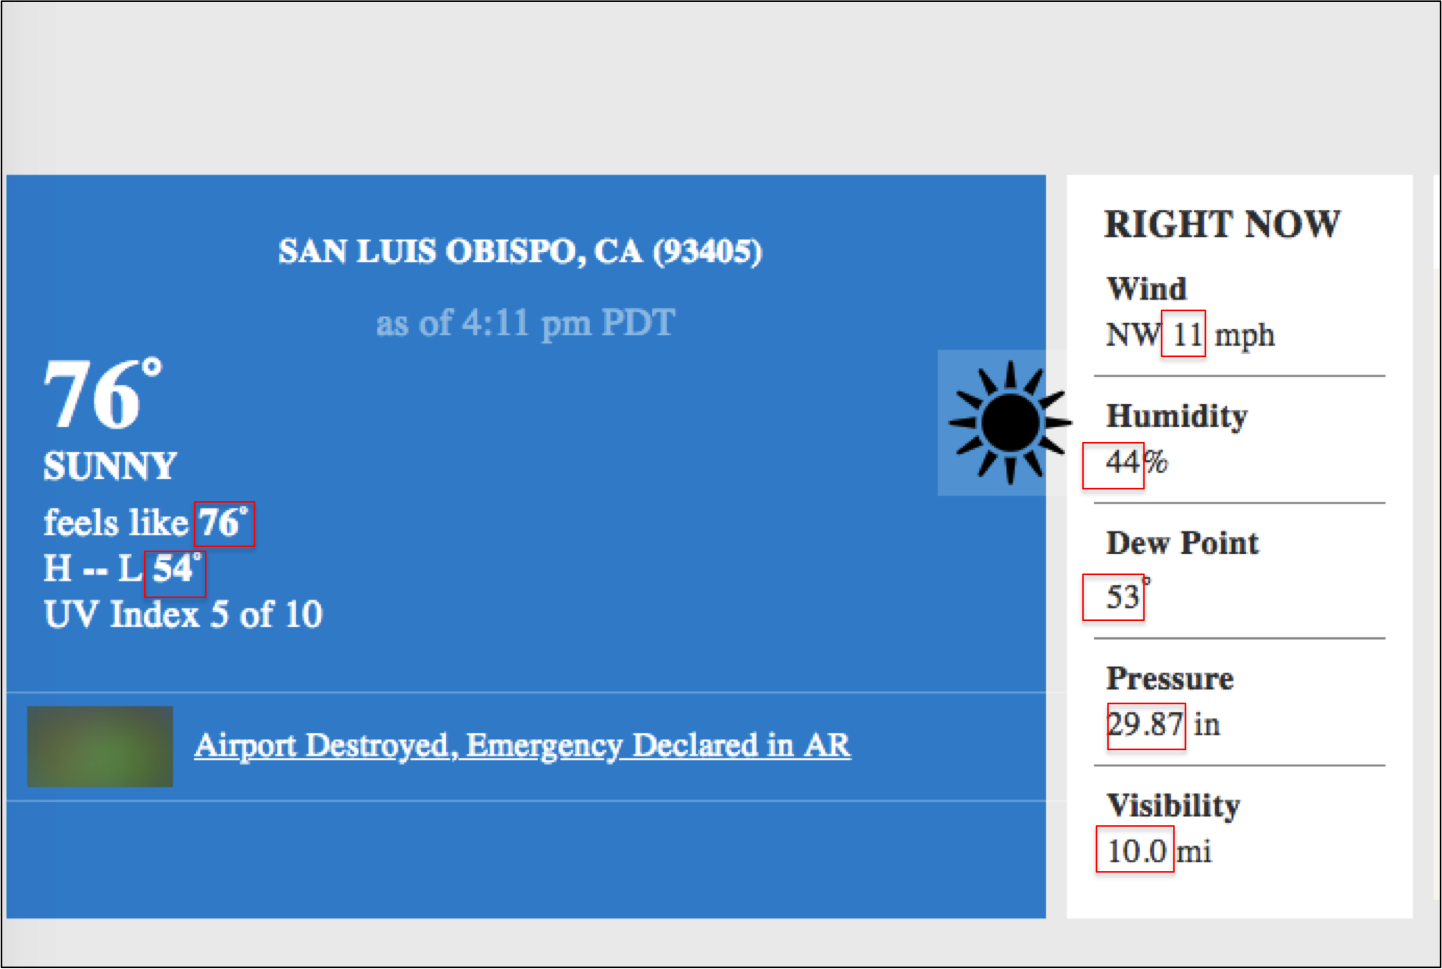

Your output will look as follows: 
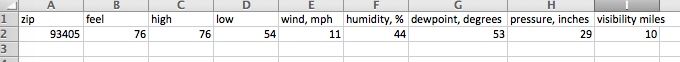

**Part II** Turn the scraper into a class called <span style="color:green"> Weather()</span> with <span style="color:green"> zip</span> as an attribute and a method that scrapes and stores the data in a csv called <span style="color:green"> to_csv()</span>. Create two instances of the class for SLO and Harlem, zips 93405 and 10026. Call the method SLO.to_csv() and Harlem.to_csv(). 

# Part I

In [9]:
# load the libraries
import csv
import urllib.request as url
from bs4 import BeautifulSoup

In [10]:
# save the file 
zip = '93405'
# name the url
u = "https://weather.com/weather/today/l/" + zip + ":4:US"

# first save the url to an html file
url.urlretrieve(u, "slo.html")

# now open the html file
html = open('slo.html','r').read()

# parse the html file with Beautiful Soup 
soup = BeautifulSoup(html, "html.parser")

In [13]:
# scrape the temperature next to "feels like". Hint: look for span tag and class deg-feels
feels_like = soup.find('span', class_ = 'deg-feels').text

# scrape the high and low from today. Hint search for span tag and class deg-hilo-nowcard
today = soup.find_all('span', class_ = 'deg-hilo-nowcard')
high = today[0].text
low = today[1].text

# scrape wind, humidity, dewpoint, pressure and visibility. Hint: search for the td tag and class ""
contents = soup.find_all('td', class_ = "")
wind = contents[0].text
humidity = contents[1].text
dewpoint = contents[2].text
pressure = contents[3].text
visibility = contents[4].text

#strip

feels_like = feels_like.strip("°")
high = high.strip("°")
low = low.strip("°")
wind = wind.strip('W')
wind = wind.strip('N')
wind = wind.strip('S')
wind = wind.strip('E')
wind = wind.strip('W ')
wind = wind.strip('N ')
wind = wind.strip('S ')
wind = wind.strip('E ')
wind = wind.strip(' mph')
wind = wind.strip(' ')
humidity = humidity.strip('%')
dewpoint = dewpoint.strip("°")
pressure = pressure.strip(' in')
pressure = float(pressure)
pressure = round(pressure)
visibility = visibility.strip(' mi')
visibility = float(visibility)
visibility = round(visibility)


In [12]:
# # open a csv file called 93405.csv
slo = open("93405.csv",'w')

# # create a writable excel object
doc = csv.writer(slo)

# # write the first row of each column as show in the above screenshot
columns = ['zip', 'feel','high','low','wind,mph','humidity,%','dewpoint,degrees','pressure,inches','visibility miles']
doc.writerows([columns])
# # store the data
data = ['93405',feels_like,high,low,wind,humidity,dewpoint,pressure,visibility]
    
# # write the data to the csv
doc.writerows([data])
#count = 0
#for x in columns:

    #doc(str(columns[count]))
    #count += 1

# # close the csv file
slo.close()

#slo = '93405.csv'
#writer = csv.writer(open(slo,'w'), dialect = 'excel')
#writer.writerow((columns))

#for i in range(len(slo)-8):
#    writer.writerow(data)



# Part II - Now use the above code to write a class called Weather. 

In [14]:
class Weather():
    def __init__(self, zip):
        self.zip = str(zip)
        

    def __str__(self):
        return str(self.zip)

    def to_csv(self):
        # your code here
      
        #Scraping - This could all be put in a function 
        u = "https://weather.com/weather/today/l/" + self.zip + ":4:US"
        url.urlretrieve(u, "slo.html")
        html = open('slo.html','r').read()
        soup = BeautifulSoup(html, "html.parser")
        
        
        feels_like = soup.find('span', class_ = 'deg-feels').text
        today = soup.find_all('span', class_ = 'deg-hilo-nowcard')
        high = today[0].text
        low = today[1].text
        contents = soup.find_all('td', class_ = "")
        wind = contents[0].text
        humidity = contents[1].text
        dewpoint = contents[2].text
        pressure = contents[3].text
        visibility = contents[4].text
        
        #striping 
        feels_like = feels_like.strip("°")
        high = high.strip("°")
        low = low.strip("°")
        wind = wind.strip('W')
        wind = wind.strip('N')
        wind = wind.strip('S')
        wind = wind.strip('E')
        wind = wind.strip('W ')
        wind = wind.strip('N ')
        wind = wind.strip('S ')
        wind = wind.strip('E ')
        wind = wind.strip(' mph')
        wind = wind.strip(' ')
        humidity = humidity.strip('%')
        dewpoint = dewpoint.strip("°")
        pressure = pressure.strip(' in')
        pressure = float(pressure)
        pressure = round(pressure)
        visibility = visibility.strip(' mi')
        visibility = float(visibility)
        visibility = round(visibility)
        
        #Writing      Need to figure out a way to add the header once then append each additional item

        slo = open( str(self.zip) + ".csv",'a') #'w' is for writing permission..... 'a' is to append to the last line
        doc = csv.writer(slo)
        
        #this will work as long as the header is already there
        
        columns = ['zip', 'feel','high','low','wind,mph','humidity,%','dewpoint,degrees','pressure,inches','visibility miles']
        doc.writerows([columns])
        #getFeatu
        
        data = [self.zip ,feels_like,high,low,wind,humidity,dewpoint,pressure,visibility]
        doc.writerows([data])
        slo.close()


In [15]:
# Instantiate two instances of the class Weather SLO(93405) and Harlem(10026). Call the method to_csv(). 
SLO = Weather(93405)
SLO.to_csv()

Harlem = Weather(10026)
Harlem.to_csv()